In [421]:
import numpy as np
import pandas as pd

In [422]:
train=pd.read_csv('temp_train.csv', index_col=False).drop('Unnamed: 0',1)
test=pd.read_csv('temp_test.csv', index_col=False).drop('Unnamed: 0',1)

In [427]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import os

In [442]:
model_1a = RandomForestRegressor()
model_1a.fit(train.drop('Temp',axis=1), train['Temp'])
model_1a.score(test.drop('Temp',axis=1), test['Temp'])

/Users/zysophia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9935142252985842

In [438]:
train.head()

,X_Coord,Y_Coord,Z_Coord,Temp,speed,power
0,0.18,-0.21,0.0,0.00008,0.6,125
1,0.15,-0.21,0.0,0.00008,0.6,125
2,0.12,-0.21,0.0,0.00008,0.6,125
3,0.09,-0.21,0.0,0.00009,0.6,125
4,0.06,-0.21,0.0,0.00011,0.6,125


In [464]:
train = pd.read_csv('random_samples_temp_50.csv').drop('Unnamed: 0',1)
test = pd.read_csv('random_samples_temp_50.csv').drop('Unnamed: 0',1)

train = train.assign(volumn=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**3)
train = train.assign(surface=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**2)
train = train.assign(distance=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**1)
train = train.assign(sin=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi))

model_2a = RandomForestRegressor(n_jobs=-1)
model_2a.fit(train.drop('Temp',axis=1), train['Temp'])
model_2a.score(test.drop('Temp',axis=1), test['Temp'])

/Users/zysophia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8530137132871802

In [466]:
train.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.176231,-0.200626,0.00,0.0658,-1,0.00091,200.0,0.6,70
1,0.176231,-0.200626,-0.03,0.0658,-1,0.00088,200.0,0.6,70
2,0.176231,-0.200626,-0.06,0.0658,-1,0.00078,200.0,0.6,70
3,0.176231,-0.200626,-0.09,0.0658,-1,0.00072,200.0,0.6,70
4,0.176231,-0.200626,-0.12,0.0658,-1,0.00068,200.0,0.6,70


In [559]:
# Predict 2a
work_dir='.'
for file in os.listdir(work_dir + "/2/Testing")[:-1]:
    print(file)
    if file[0]=='M':
        continue
    df_temp = pd.read_csv(work_dir + f"/2/Testing/{file}")
    df_temp["LasPower"] = int(file[7:10])
    df_temp["LasSpeed"] = float(file[0] + "." + file[2:4])
    df_temp["LasAngle"] = int(file[12:14])
    #print(df_temp)
    df_temp = df_temp.drop('Temp',1)
    y_pred_temp = model_2a.predict(df_temp)
    df_temp["Temp"] = y_pred_temp
    df_temp.drop(["LasPower", "LasSpeed", "LasAngle"], axis=1, inplace=True)
    #df_temp.to_csv(work_dir + f"/2/Testing/{file}", index=False)

1_47ms_310W_60Deg.csv
0_77ms_110W_80Deg.csv
1_38ms_240W_40Deg.csv
0_77ms_390W_20Deg.csv
0_77ms_310W_40Deg.csv
1_38ms_160W_40Deg.csv
1_07ms_390W_80Deg.csv
0_62ms_110W_20Deg.csv
0_77ms_240W_40Deg.csv
0_77ms_160W_40Deg.csv
1_38ms_310W_40Deg.csv
1_47ms_240W_60Deg.csv
1_07ms_110W_20Deg.csv
0_62ms_390W_80Deg.csv
1_38ms_390W_20Deg.csv
0_93ms_240W_20Deg.csv
1_47ms_390W_80Deg.csv
0_62ms_240W_60Deg.csv
1_07ms_160W_60Deg.csv
0_62ms_160W_60Deg.csv
0_93ms_160W_20Deg.csv
1_07ms_240W_60Deg.csv
1_07ms_310W_60Deg.csv
0_93ms_390W_40Deg.csv
0_93ms_310W_20Deg.csv
0_62ms_310W_60Deg.csv
1_07ms_160W_40Deg.csv
0_62ms_240W_40Deg.csv
0_77ms_110W_20Deg.csv
0_77ms_390W_80Deg.csv
1_07ms_240W_40Deg.csv
0_62ms_160W_40Deg.csv
0_62ms_110W_80Deg.csv
1_07ms_390W_20Deg.csv
Melt_Pool_Dimensions.csv
1_07ms_310W_40Deg.csv
0_62ms_310W_40Deg.csv
0_62ms_390W_20Deg.csv
1_38ms_390W_80Deg.csv
0_93ms_390W_60Deg.csv
1_38ms_240W_60Deg.csv
1_47ms_390W_20Deg.csv
0_93ms_240W_80Deg.csv
1_47ms_310W_40Deg.csv
0_93ms_160W_80Deg.csv
0_77ms_

In [450]:
# Predict 1a
work_dir='.'
for file in os.listdir(work_dir + "/1/Testing")[:-1]:
    print(file)
    df_temp = pd.read_csv(work_dir + f"/1/Testing/{file}")
    df_temp["speed"] = float(file[0] + "." + file[2:4])
    df_temp["power"] = int(file[-8:-5])
    print(df_temp)
    df_temp = df_temp.drop('Temp',1)
    y_pred_temp = model_1a.predict(df_temp)
    df_temp["Temp"] = y_pred_temp
    df_temp.drop(["power", "speed"], axis=1, inplace=True)
    df_temp.to_csv(work_dir + f"/1/Testing/{file}", index=False)

0_83ms_170W.csv
      X_Coord  Y_Coord  Z_Coord      Temp  speed  power
0        0.18    -0.21     0.00  0.000257   0.83    170
1        0.15    -0.21     0.00  0.000257   0.83    170
2        0.12    -0.21     0.00  0.000257   0.83    170
3        0.09    -0.21     0.00  0.000257   0.83    170
4        0.06    -0.21     0.00  0.000257   0.83    170
...       ...      ...      ...       ...    ...    ...
3643    -1.38     0.00    -0.21  0.008860   0.83    170
3644    -1.41     0.00    -0.21  0.008860   0.83    170
3645    -1.44     0.00    -0.21  0.008860   0.83    170
3646    -1.47     0.00    -0.21  0.008860   0.83    170
3647    -1.50     0.00    -0.21  0.008860   0.83    170

[3648 rows x 6 columns]
1_23ms_380W.csv
      X_Coord  Y_Coord  Z_Coord      Temp  speed  power
0        0.18    -0.21     0.00  0.000257   1.23    380
1        0.15    -0.21     0.00  0.000257   1.23    380
2        0.12    -0.21     0.00  0.000257   1.23    380
3        0.09    -0.21     0.00  0.000257   1.2

ValueError: could not convert string to float: 'M.lt'

In [470]:
x = pd.read_csv('./2/Testing/Melt_Pool_Dimensions.csv')

In [218]:
x = train[(train.speed==0.7)&(train.power==150)]

In [225]:
for i in np.arange(0.03,0.08,0.001):
    xx = x[x.Temp>i]

    print(round(i,4),round(max(xx.X_Coord)-min(xx.X_Coord),4), -2*min(xx.Y_Coord), min(xx.Z_Coord))

0.03 1.08 0.18 -0.09
0.031 1.05 0.18 -0.09
0.032 1.02 0.18 -0.09
0.033 0.96 0.18 -0.09
0.034 0.93 0.18 -0.09
0.035 0.9 0.18 -0.09
0.036 0.87 0.18 -0.09
0.037 0.84 0.18 -0.09
0.038 0.81 0.18 -0.09
0.039 0.78 0.18 -0.06
0.04 0.75 0.18 -0.06
0.041 0.75 0.12 -0.06
0.042 0.72 0.12 -0.06
0.043 0.69 0.12 -0.06
0.044 0.69 0.12 -0.06
0.045 0.66 0.12 -0.06
0.046 0.66 0.12 -0.06
0.047 0.63 0.12 -0.06
0.048 0.63 0.12 -0.06
0.049 0.6 0.12 -0.06
0.05 0.6 0.12 -0.06
0.051 0.57 0.12 -0.06
0.052 0.57 0.12 -0.06
0.053 0.54 0.12 -0.06
0.054 0.54 0.12 -0.06
0.055 0.51 0.12 -0.06
0.056 0.48 0.12 -0.06
0.057 0.48 0.12 -0.06
0.058 0.45 0.12 -0.06
0.059 0.45 0.12 -0.06
0.06 0.42 0.12 -0.06
0.061 0.42 0.12 -0.06
0.062 0.39 0.12 -0.06
0.063 0.39 0.12 -0.06
0.064 0.39 0.06 -0.06
0.065 0.36 0.06 -0.06
0.066 0.36 0.06 -0.06
0.067 0.36 0.06 -0.06
0.068 0.33 0.06 -0.03
0.069 0.33 0.06 -0.03
0.07 0.33 0.06 -0.03
0.071 0.3 0.06 -0.03
0.072 0.3 0.06 -0.03
0.073 0.3 0.06 -0.03
0.074 0.3 0.06 -0.03
0.075 0.27 0.06 -0.03


In [561]:
x = pd.read_csv('Melt_Pool_Dimensions_2.csv')
y = pd.read_csv('./2/Testing/Melt_Pool_Dimensions.csv')
cv = pd.read_csv('Melt_Pool_Dimensions_2_cv.csv')
x.head()

,Laser_Speed,Laser_Power,Edge_Angle,Edge_Distance,Laser_Direction,Melt_Pool_Length,Melt_Pool_Width,Melt_Pool_Depth
0,0.6,100,90,0.10,-1,0.0576,0.3142,0.1141
1,0.6,100,90,0.13,-1,0.0297,0.3349,0.1531
2,0.6,100,90,0.16,-1,0.0295,0.3369,0.1669
3,0.6,100,90,0.19,-1,0.0492,0.3352,0.1769
4,0.6,100,90,0.22,-1,0.0683,0.3296,0.1761


In [562]:
x = x.assign(volumn=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**3)
x = x.assign(surface=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**2)
x = x.assign(distance=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**1)
x = x.assign(sin=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi))

y = y.assign(volumn=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**3)
y = y.assign(surface=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**2)
y = y.assign(distance=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi)*x.Edge_Distance**1)
y = y.assign(sin=lambda x: 1/np.sin(x.Edge_Angle/180*np.pi))

In [563]:
x.head()

,Laser_Speed,Laser_Power,Edge_Angle,Edge_Distance,Laser_Direction,Melt_Pool_Length,Melt_Pool_Width,Melt_Pool_Depth,volumn,surface,distance,sin
0,0.6,100,90,0.10,-1,0.0576,0.3142,0.1141,0.001000,0.0100,0.10,1.0
1,0.6,100,90,0.13,-1,0.0297,0.3349,0.1531,0.002197,0.0169,0.13,1.0
2,0.6,100,90,0.16,-1,0.0295,0.3369,0.1669,0.004096,0.0256,0.16,1.0
3,0.6,100,90,0.19,-1,0.0492,0.3352,0.1769,0.006859,0.0361,0.19,1.0
4,0.6,100,90,0.22,-1,0.0683,0.3296,0.1761,0.010648,0.0484,0.22,1.0


In [528]:
ss=[0.8,0.9]
ps=[150,200]
x2 = x[(x.Edge_Angle==70)|(x.Laser_Speed==0.9)|(x.Laser_Power==150)]
x1 = x[(x.Edge_Angle!=70)&(x.Laser_Speed!=0.9)&(x.Laser_Power!=150)]

In [564]:
ts = ['Melt_Pool_Depth', 'Melt_Pool_Width', 'Melt_Pool_Length']
df = y
for t in ts:
    mod = RandomForestRegressor()
    mod.fit(x.drop(['Melt_Pool_Depth', 'Melt_Pool_Width', 'Melt_Pool_Length'],1), x[t])
    print(mod.score(y.drop(['Melt_Pool_Depth', 'Melt_Pool_Width', 'Melt_Pool_Length'],1), y[t]))
    df[t] = mod.predict(y.drop(['Melt_Pool_Depth', 'Melt_Pool_Width', 'Melt_Pool_Length'],1))

/Users/zysophia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0


/Users/zysophia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0


/Users/zysophia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0


In [565]:
mod.feature_importances_

array([6.57465370e-03, 3.31880732e-02, 1.61288246e-04, 4.81541980e-02,
       8.29674189e-03, 3.48422085e-02, 9.78215167e-02, 7.70810399e-01,
       1.50921037e-04])

In [566]:
df.to_csv('model2b_test_rf.csv')

In [419]:
mod = RandomForestRegressor()
mod.fit(x2.drop(['Melt_Pool_Depth', 'Melt_Pool_Width', 'Melt_Pool_Length'],1), x2['Melt_Pool_Width'])
mod.score(x1.drop(['Melt_Pool_Depth', 'Melt_Pool_Width', 'Melt_Pool_Length'],1), x1['Melt_Pool_Width'])

/Users/zysophia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9436021700935351

In [417]:
x3 = pd.read_csv('Melt_Pool_Dimensions_cv.csv')
x3

,Laser_Speed,Laser_Power,Melt_Pool_Length,Melt_Pool_Width,Melt_Pool_Depth
0,0.65,250,0.5172,0.6458,0.6286
1,0.65,400,0.9825,0.9500,0.9493
2,0.70,325,0.7503,0.7618,0.7440
3,0.80,200,0.3563,0.4269,0.4157
4,0.80,225,0.4343,0.4929,0.4766
5,0.85,200,0.3590,0.3968,0.3891
6,0.85,325,0.7500,0.6470,0.6299
7,0.85,375,0.9040,0.7260,0.7085
8,0.90,300,0.6747,0.5827,0.5640
9,0.95,125,0.1317,0.2257,0.2205


In [420]:
mod.score(x3.drop(['Melt_Pool_Depth', 'Melt_Pool_Width', 'Melt_Pool_Length'],1), x3['Melt_Pool_Width'])

0.9947279048928035

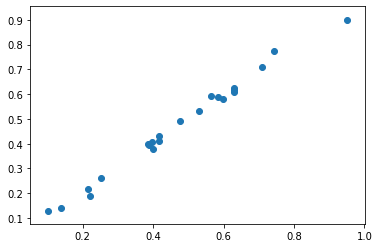

In [127]:
plt.scatter(x3['Melt_Pool_Depth'],mod.predict(x3[['Laser_Speed', 'Laser_Power']]))

In [300]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [549]:
train = pd.read_csv('random_samples_temp_50.csv').drop('Unnamed: 0',1)
test = pd.read_csv('random_samples_temp_10.csv').drop('Unnamed: 0',1)

In [337]:
train=train[train['Laser_Direction']==-1]
test=test[test['Laser_Direction']==-1]

In [548]:
train = train.assign(inv_d1=lambda x: 1/(x.X_Coord**2+x.Y_Coord**2+x.Z_Coord**2))
test = test.assign(inv_d1=lambda x: 1/(x.X_Coord**2+x.Y_Coord**2+x.Z_Coord**2))

In [365]:
train = train.assign(inv_d2=lambda x: 1/x.Edge_Distance)
test = test.assign(inv_d2=lambda x: 1/x.Edge_Distance)

In [550]:
train = train.assign(surface=lambda x: 1/np.sin(x.LasAngle/180*np.pi)*x.Edge_Distance**2)
test = test.assign(surface=lambda x: 1/np.sin(x.LasAngle/180*np.pi)*x.Edge_Distance**2)

In [551]:
train = train.assign(volumn=lambda x: 1/np.sin(x.LasAngle/180*np.pi)*x.Edge_Distance**3)
test = test.assign(volumn=lambda x: 1/np.sin(x.LasAngle/180*np.pi)*x.Edge_Distance**3)

In [552]:
train = train.assign(distance=lambda x: 1/np.sin(x.LasAngle/180*np.pi)*x.Edge_Distance**1)
test = test.assign(distance=lambda x: 1/np.sin(x.LasAngle/180*np.pi)*x.Edge_Distance**1)

In [553]:
train = train.assign(sin=lambda x: 1/np.sin(x.LasAngle/180*np.pi)*x.Edge_Distance**0)
test = test.assign(sin=lambda x: 1/np.sin(x.LasAngle/180*np.pi)*x.Edge_Distance**0)

In [554]:
mod = RandomForestRegressor(n_jobs=-1)
mod.fit(train.drop('Temp',axis=1), train['Temp'])
mod.score(test.drop('Temp',axis=1), test['Temp'])


/Users/zysophia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9226064387189015

In [555]:
r2_score(mod.predict(test.drop('Temp',axis=1)), test['Temp'])

0.9288190337623194

In [556]:
mean_squared_error(mod.predict(test.drop('Temp',axis=1)), test['Temp'])

6.979240544074113e-05

In [557]:
mod.feature_importances_

array([0.2308322 , 0.36963364, 0.20407366, 0.01028999, 0.00129974,
       0.06886451, 0.05736078, 0.00070247, 0.02172038, 0.0176983 ,
       0.01691689, 0.00060743])

In [558]:
train.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle,surface,volumn,distance,sin
0,0.176231,-0.200626,0.00,0.0658,-1,0.00091,200.0,0.6,70,0.004608,0.000303,0.070023,1.064178
1,0.176231,-0.200626,-0.03,0.0658,-1,0.00088,200.0,0.6,70,0.004608,0.000303,0.070023,1.064178
2,0.176231,-0.200626,-0.06,0.0658,-1,0.00078,200.0,0.6,70,0.004608,0.000303,0.070023,1.064178
3,0.176231,-0.200626,-0.09,0.0658,-1,0.00072,200.0,0.6,70,0.004608,0.000303,0.070023,1.064178
4,0.176231,-0.200626,-0.12,0.0658,-1,0.00068,200.0,0.6,70,0.004608,0.000303,0.070023,1.064178


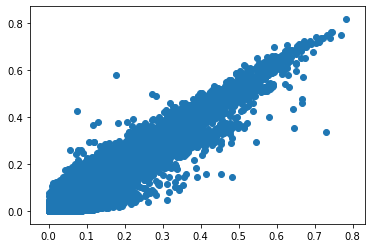

In [201]:
plt.scatter(test[test['Laser_Direction']==-1]['Temp'],mod.predict(test[test['Laser_Direction']==-1].drop('Temp',axis=1)))

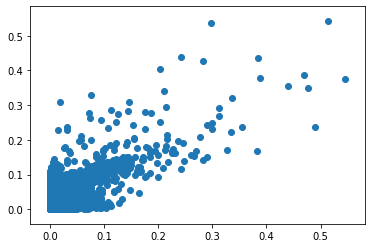

In [151]:
plt.scatter(test[test['Laser_Direction']==1]['Temp'],mod.predict(test[test['Laser_Direction']==1].drop('Temp',axis=1)))

In [147]:
train.head()

,X_Coord,Y_Coord,Z_Coord,Edge_Distance,Laser_Direction,Temp,LasPower,LasSpeed,LasAngle
0,0.176231,-0.200626,0.00,0.0658,-1,0.00091,200.0,0.6,70
1,0.176231,-0.200626,-0.03,0.0658,-1,0.00088,200.0,0.6,70
2,0.176231,-0.200626,-0.06,0.0658,-1,0.00078,200.0,0.6,70
3,0.176231,-0.200626,-0.09,0.0658,-1,0.00072,200.0,0.6,70
4,0.176231,-0.200626,-0.12,0.0658,-1,0.00068,200.0,0.6,70


In [159]:
d1 = test[(test['speed']==0.6)&(test['power']==100)]

In [177]:
mat = np.zeros((15,57))

In [178]:
d1

,X_Coord,Y_Coord,Z_Coord,Temp,speed,power
0,0.18,-0.21,0.00,0.00008,0.6,100
1,0.15,-0.21,0.00,0.00008,0.6,100
2,0.12,-0.21,0.00,0.00008,0.6,100
3,0.09,-0.21,0.00,0.00009,0.6,100
4,0.06,-0.21,0.00,0.00010,0.6,100
...,...,...,...,...,...,...
3643,-1.38,0.00,-0.21,0.00727,0.6,100
3644,-1.41,0.00,-0.21,0.00722,0.6,100
3645,-1.44,0.00,-0.21,0.00718,0.6,100
3646,-1.47,0.00,-0.21,0.00715,0.6,100


In [175]:
(max(x)-min(x))/0.03

56.0

In [186]:
mtx = d1.Temp.values.reshape(57,-1)

In [189]:
d1

,X_Coord,Y_Coord,Z_Coord,Temp,speed,power
0,0.18,-0.21,0.00,0.00008,0.6,100
1,0.15,-0.21,0.00,0.00008,0.6,100
2,0.12,-0.21,0.00,0.00008,0.6,100
3,0.09,-0.21,0.00,0.00009,0.6,100
4,0.06,-0.21,0.00,0.00010,0.6,100
...,...,...,...,...,...,...
3643,-1.38,0.00,-0.21,0.00727,0.6,100
3644,-1.41,0.00,-0.21,0.00722,0.6,100
3645,-1.44,0.00,-0.21,0.00718,0.6,100
3646,-1.47,0.00,-0.21,0.00715,0.6,100


In [183]:
0.21/0.03

7.0